## Read data (Đọc dữ liệu)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hoang\Downloads\diamonds.csv")

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df1 = df.drop(columns = 'Unnamed: 0')

Về tập tin này:
- Khung dữ liệu có 53940 hàng và 10 biến
- Giá tính: USD(\$326--\$18.823)
- Trọng lượng của kim cương: Carat(0,2--5,01) 
- Chất lượng của vết cắt: (Tạm được, Tốt, Rất tốt, Cao cấp, Lý tưởng)
- Màu sắc của kim cương: từ J (tệ nhất) đến D (tốt nhất)
- ộ tinh khiết của kim cương (I1 (tệ nhất), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (tốt nhất))
- x: chiều dài tính bằng mm (0--10,74)
- y: chiều rộng tính bằng mm (0--58,9)
- z: chiều sâu tính bằng mm (0--31,8)
- Chiều sâu = z / trung bình (x, y) = 2 * z / (x + y) (43--79) 
- Chiều rộng mặt bàn của đỉnh kim cương so với điểm rộng nhất (43--95)

## Data Pre-processing (Tiền xử lí dữ liệu)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df1 = df.drop(columns = 'Unnamed: 0')


In [9]:
df1.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [11]:
df1.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [12]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
df1.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
df1.drop(df1[(df1["x"]==0) | (df1["y"]==0) | (df1["z"]==0)].index, inplace=True)
df1.shape

(53920, 10)

## Exploratory Data Analysis (Phân tích dữ liệu thăm dò)

In [16]:
df1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Target - Label - Output : Price

Numerical features : carat, depth, table, price, x, y, z -> xử lý null, normalize -> [0,1]

Categorical features : cut, color, clarity -> xử lý null, label encoder/ (value có tính so sánh) or one hot encoder - đưa về các cột = số nhóm, gom nhóm trong trường hợp số lượng nhóm to

## Visualization (Trực quan hóa)

c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

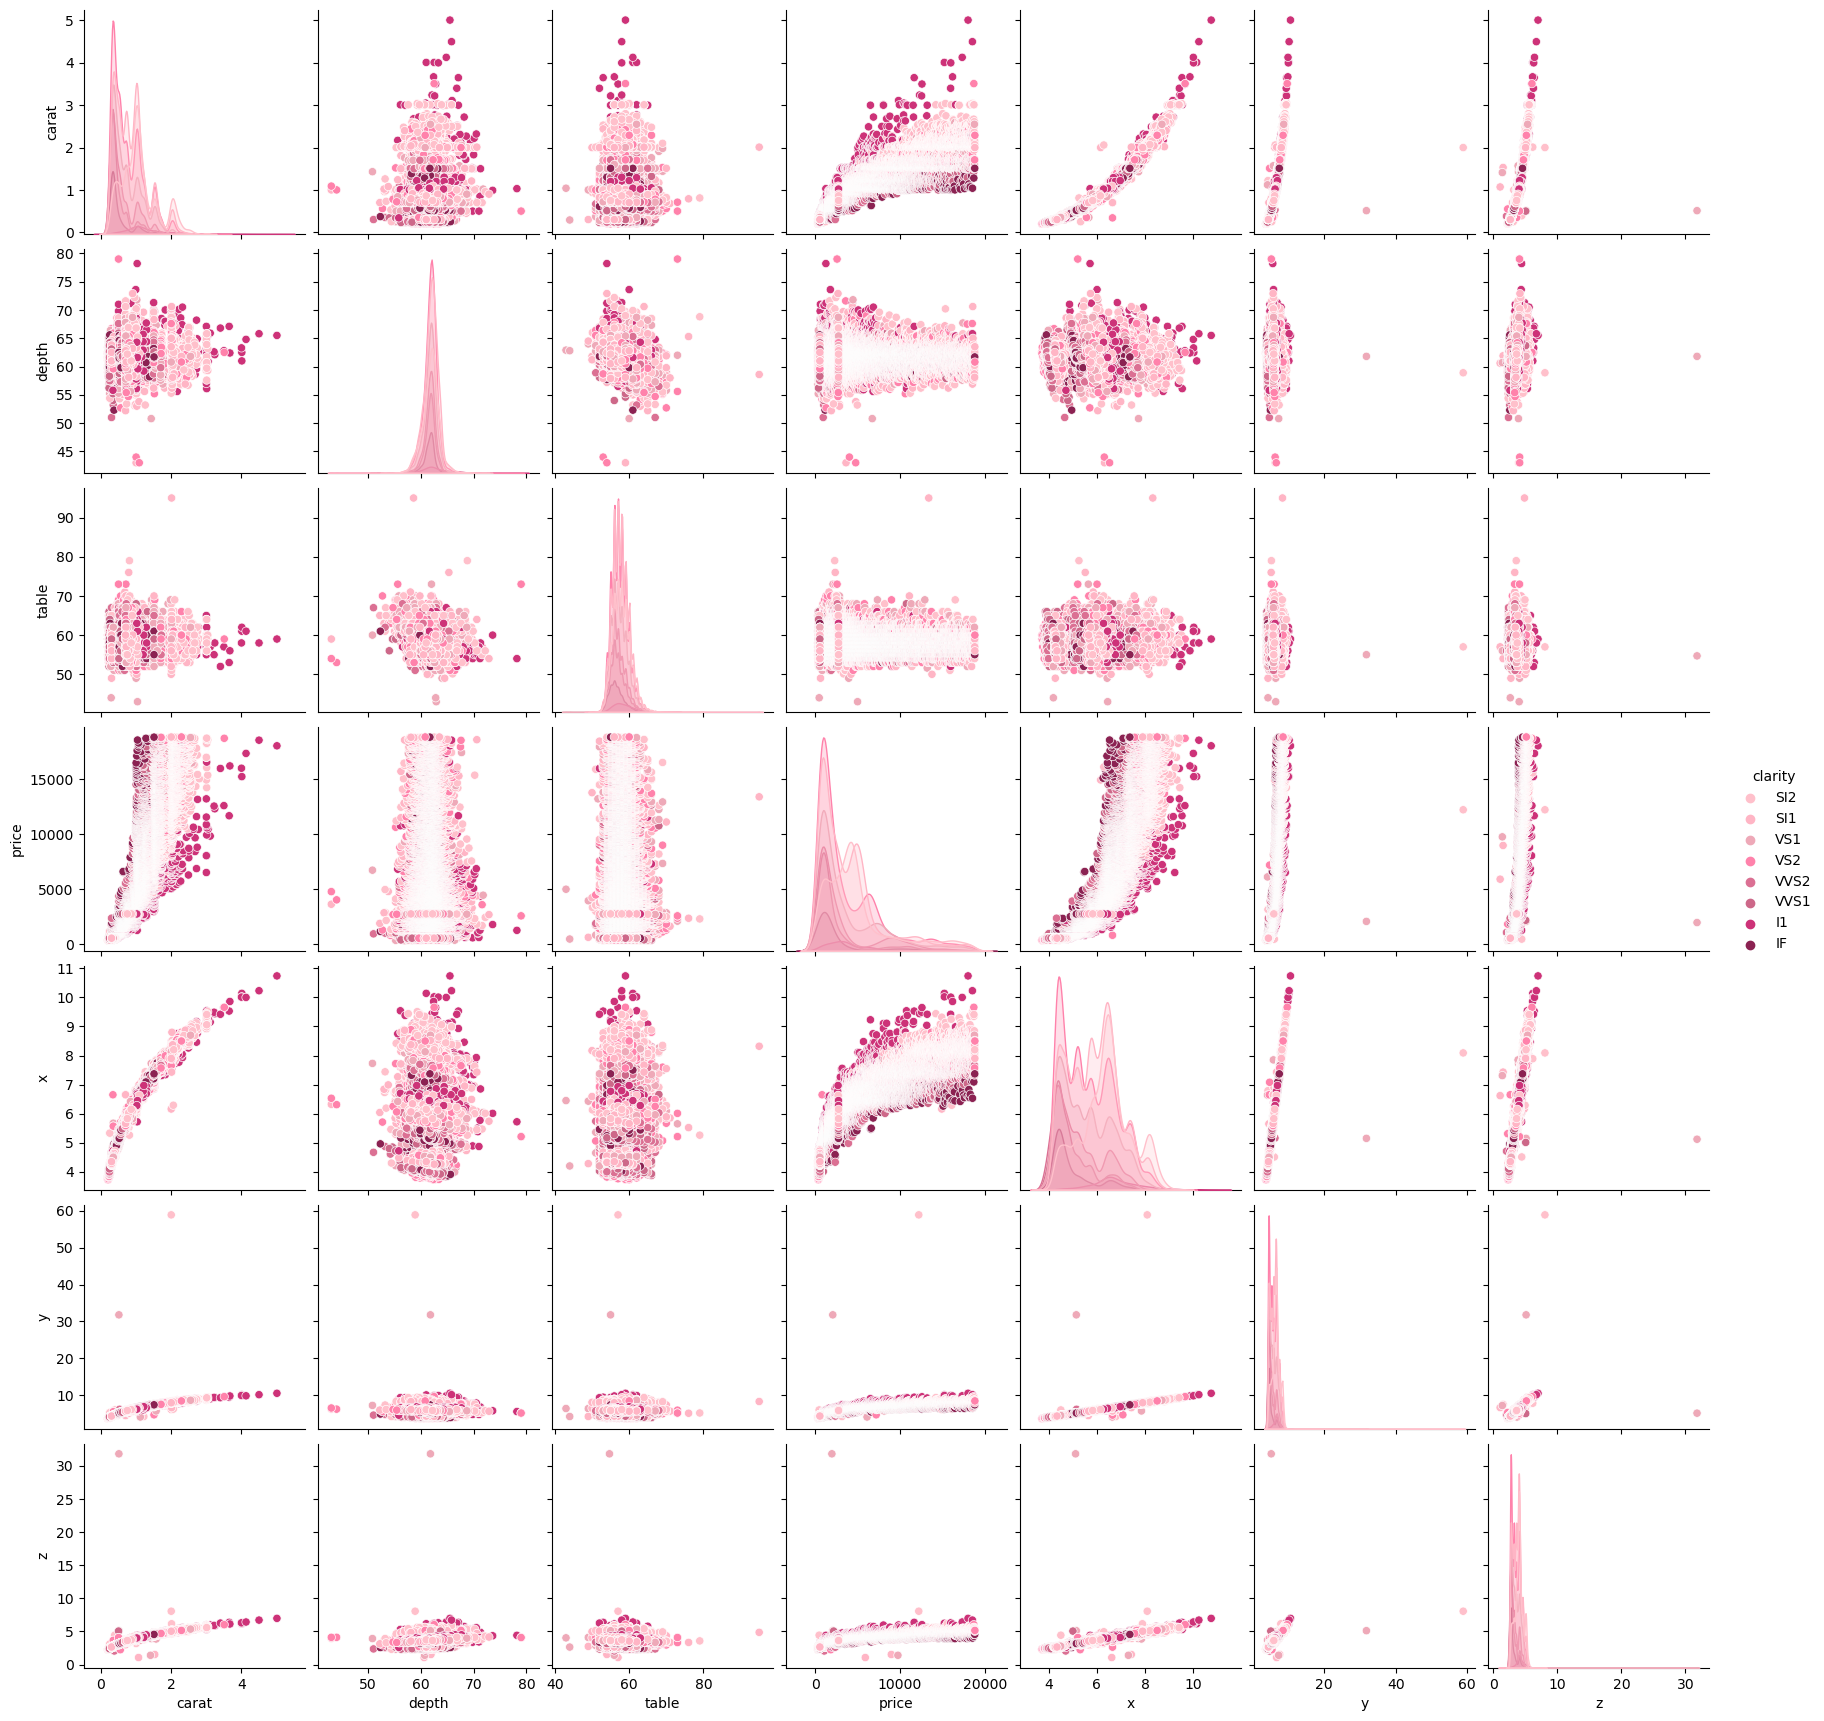

In [18]:
shade = ['#FFC0CB','#FFB5C5','#EEA9B8','#FF82AB','#DB7093','#CD6889','#CD3278','#8B2252']
ax = sns.pairplot(df1, hue ='clarity', palette = shade)

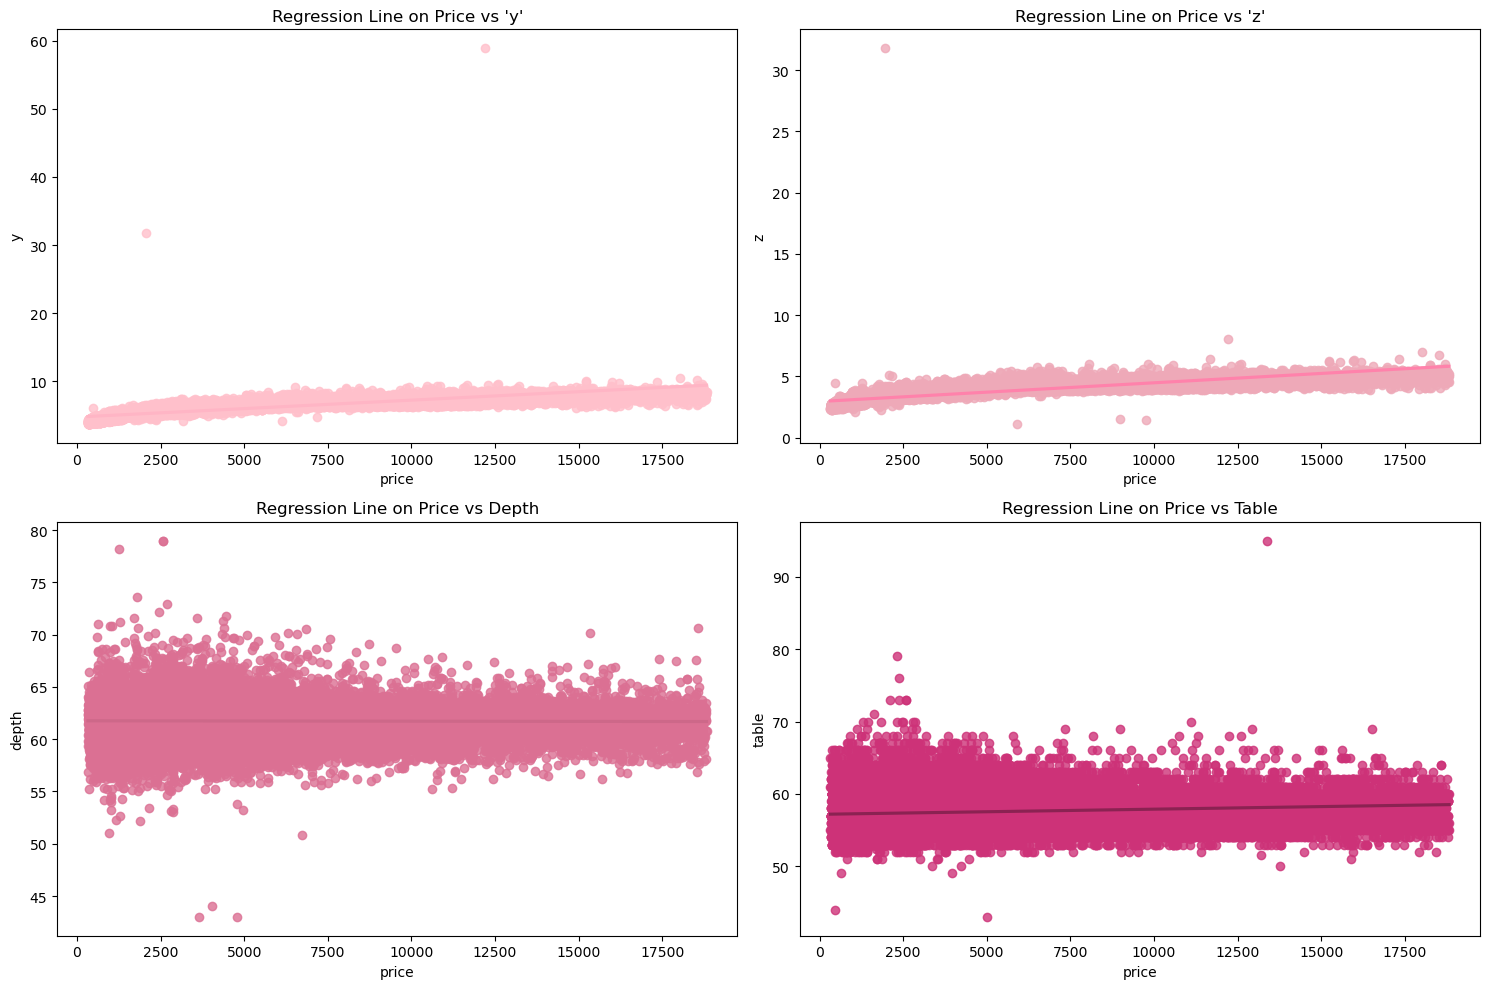

In [19]:
shade = ['#FFC0CB','#FFB5C5','#EEA9B8','#FF82AB','#DB7093','#CD6889','#CD3278','#8B2252']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Biểu đồ 1: Price vs 'y'
sns.regplot(x="price", y="y", data=df1, fit_reg=True, 
            scatter_kws={"color": shade[0]}, line_kws={"color": shade[1]}, ax=ax[0,0])
ax[0,0].set_title("Regression Line on Price vs 'y'")

# Biểu đồ 2: Price vs 'z'
sns.regplot(x="price", y="z", data=df1, fit_reg=True, 
            scatter_kws={"color": shade[2]}, line_kws={"color": shade[3]}, ax=ax[0,1])
ax[0,1].set_title("Regression Line on Price vs 'z'")

# Biểu đồ 3: Price vs Depth
sns.regplot(x="price", y="depth", data=df1, fit_reg=True, 
            scatter_kws={"color": shade[4]}, line_kws={"color": shade[5]}, ax=ax[1,0])
ax[1,0].set_title("Regression Line on Price vs Depth")

# Biểu đồ 4: Price vs Table
sns.regplot(x="price", y="table", data=df1, fit_reg=True, 
            scatter_kws={"color": shade[6]}, line_kws={"color": shade[7]}, ax=ax[1,1])
ax[1,1].set_title("Regression Line on Price vs Table")

plt.tight_layout()
plt.show()

In [ ]:
# loại bỏ bớt outliners
df1 = df1[(df1["depth"] < 75) & (df1["depth"] > 45)]
df1 = df1[(df1["table"] < 80) & (df1["table"] > 40)]
df1 = df1[df1["y"] < 30]
df1 = df1[(df1["z"] < 30) & (df1["z"] > 2)]
df1.shape

(53907, 10)

c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

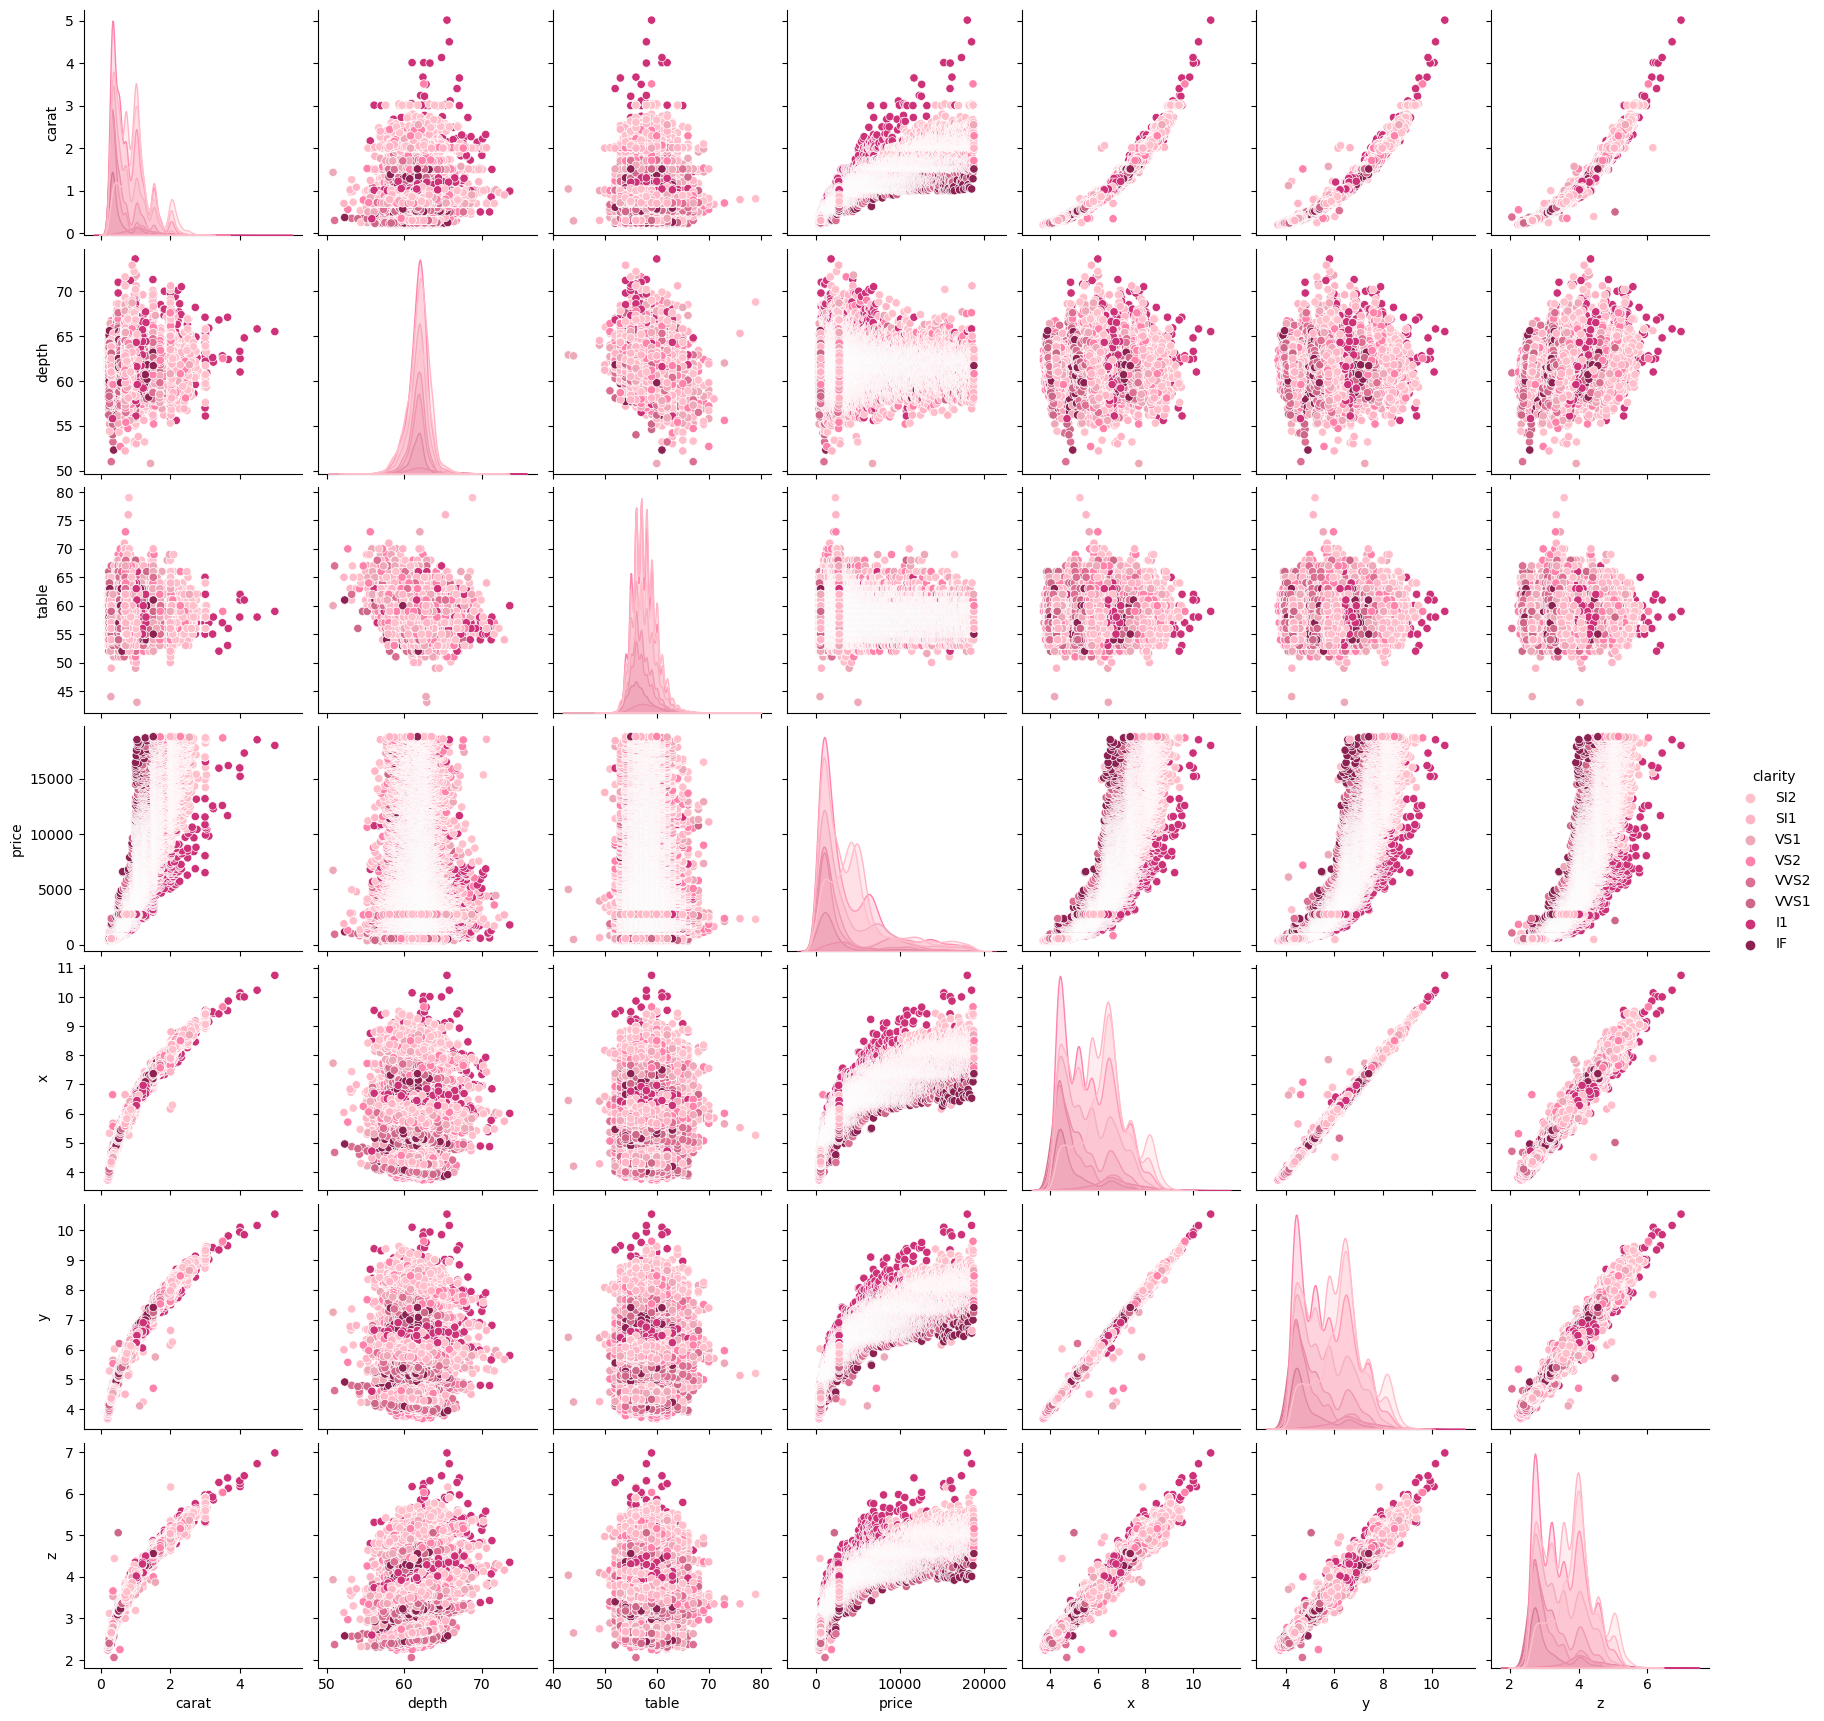

In [21]:
ax = sns.pairplot(df1,hue = 'clarity',palette = shade)

#### => Bộ dữ liệu đã được làm sạch


## Categorical variables (Các biến phân loại)


In [22]:
s = (df1.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)

Categorical variables: ['cut', 'color', 'clarity']


=> Có 3 biến phân loại là 'cut', 'color' và 'clarity'

Phân loại này mô tả mức độ khuyết điểm bên trong viên kim cương. Kim cương càng ít khuyết điểm sẽ có giá trị cao hơn.

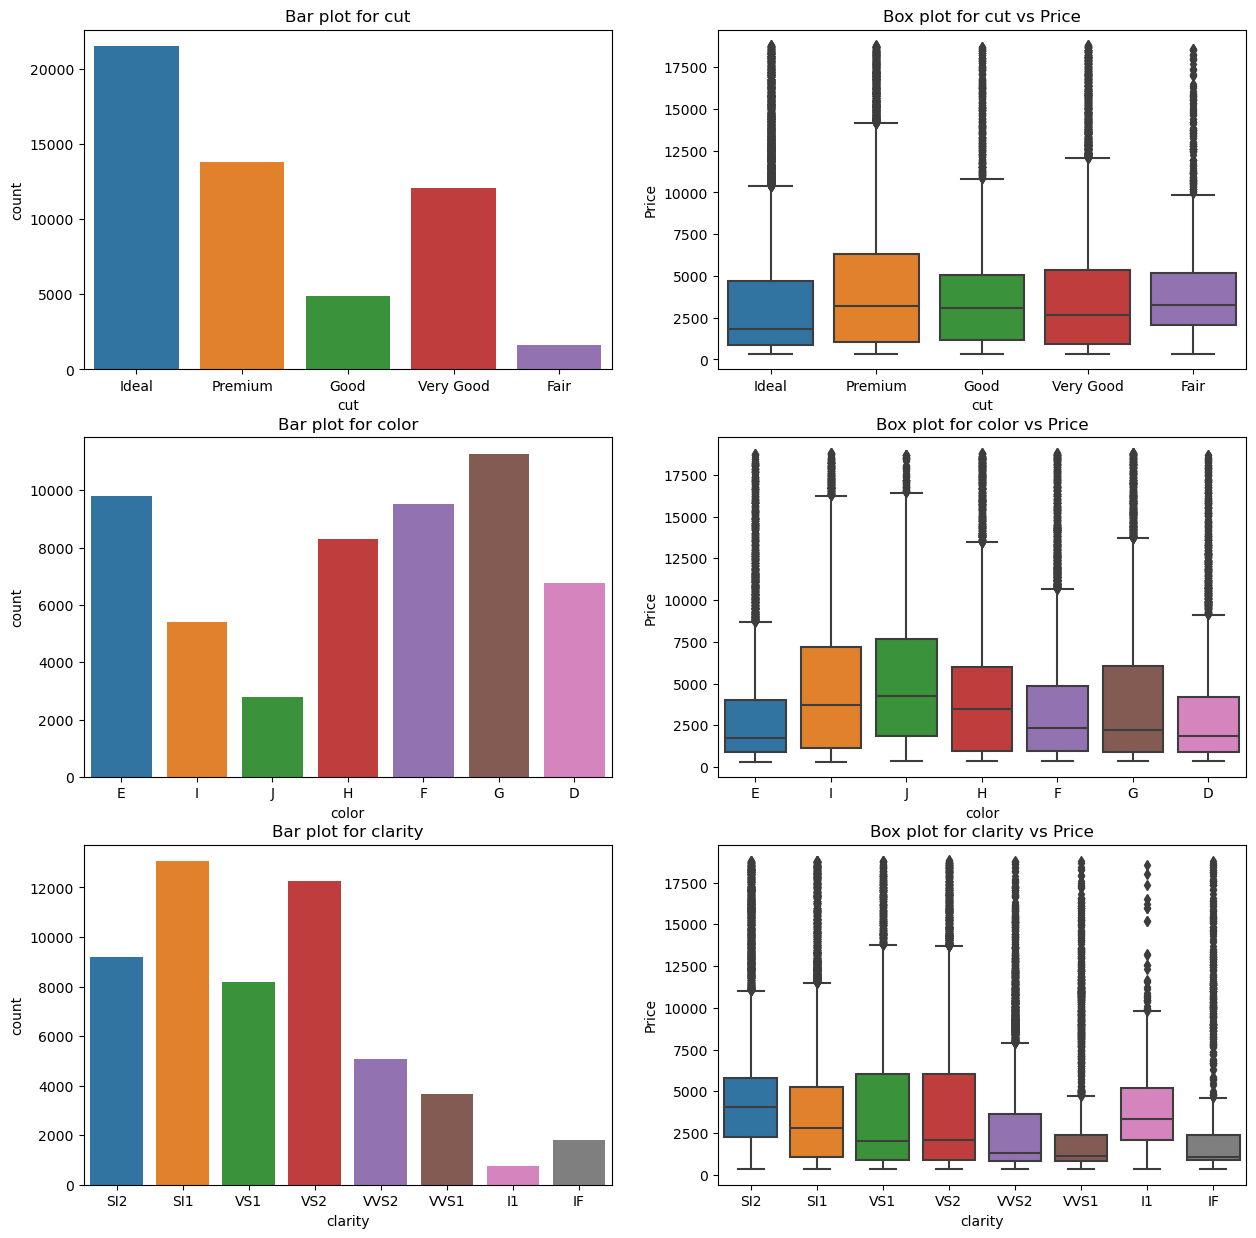

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, col in enumerate(object_cols):
    sns.countplot(x=col, data=df1, ax=ax[i,0])
    ax[i,0].set_title(f"Bar plot for {col}")
    ax[i,0].set_xlabel(col)

    sns.boxplot(x=col, y="price", data=df1, ax=ax[i,1])
    ax[i,1].set_title(f"Box plot for {col} vs Price")
    ax[i,1].set_ylabel("Price")
    ax[i,1].set_xlabel(col)

## Feature Engineering (Chuyển đổi dữ liệu)

Numerical columns -> scale/normalize -> range[0,1]
categorical -> label/one-hot encoder

In [24]:
# Make copy to avoid changing original data 
label_data = df1.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

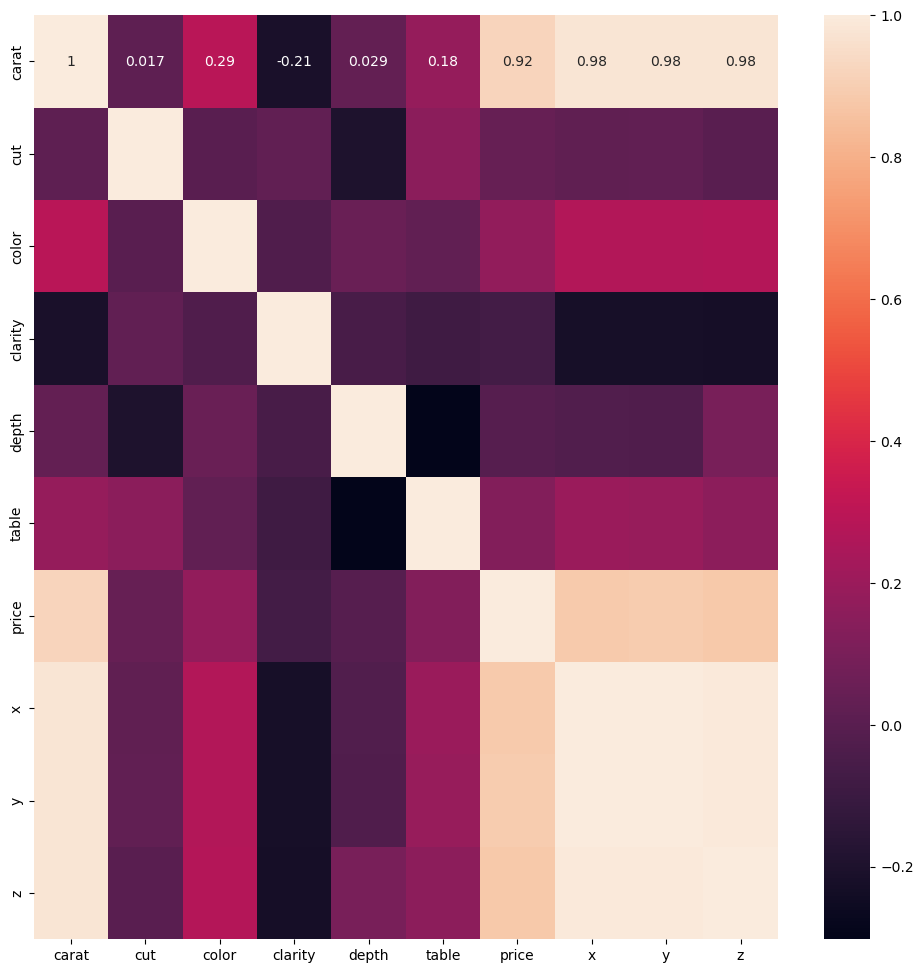

In [25]:
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, annot=True)

"x", "y" và "z" có mối tương quan cao với cột mục tiêu. "depth", "cut" và "table" cho thấy mối tương quan thấp. 

=>  Chúng ta có thể xem xét việc loại bỏ những cột này.

"carat" có mối tương quan cao với "x", "y" và "z". 


### Training model (Đào tạo mô hình)

In [26]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,train_size = 0.8, random_state=42)

In [27]:
X_train.head(10)

,carat,cut,color,clarity,depth,table,x,y,z
41069,0.51,2,4,2,59.9,56.0,5.19,5.23,3.12
2012,0.78,3,0,2,61.8,59.0,5.93,5.88,3.65
23555,1.51,3,1,2,62.6,55.0,7.33,7.25,4.56
7231,1.01,4,6,2,63.0,54.0,6.35,6.41,4.02
46595,0.54,2,2,5,61.4,57.0,5.25,5.20,3.21
47271,0.52,2,1,4,61.8,55.0,5.17,5.22,3.21
52855,0.59,3,1,5,60.1,59.0,5.46,5.42,3.27
6863,0.89,2,2,2,62.1,55.0,6.15,6.18,3.83
47970,0.28,4,0,7,64.0,56.0,4.14,4.17,2.66
34638,0.31,2,1,5,61.8,55.0,4.39,4.35,2.70


In [28]:
y_train.head(10)

41069     1192
2012      3103
23555    11565
7231      4194
46595     1786
47271     1844
52855     2578
6863      4127
47970      532
34638      872
Name: price, dtype: int64

## Linear Regression (Hồi quy tuyến tính)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import joblib

data = pd.read_csv(r"C:\Users\hoang\Downloads\diamonds.csv")

# Xử lý dữ liệu
# Mã hóa các biến phân loại (Categorical Variables) như 'cut', 'color', 'clarity'
cut_encoder = LabelEncoder()
color_encoder = LabelEncoder()
clarity_encoder = LabelEncoder()

data['cut'] = cut_encoder.fit_transform(data['cut'])
data['color'] = color_encoder.fit_transform(data['color'])
data['clarity'] = clarity_encoder.fit_transform(data['clarity'])

# Chọn các cột cần thiết
X = data[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']]  # Input
y = data['price']  # Biến mục tiêu (giá)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Lưu mô hình và các encoder để sử dụng sau này
joblib.dump(linear_model, 'linear_regression_model.pkl')
joblib.dump(cut_encoder, 'cut_encoder.pkl')
joblib.dump(color_encoder, 'color_encoder.pkl')
joblib.dump(clarity_encoder, 'clarity_encoder.pkl')

print("Huấn luyện mô hình hồi quy tuyến tính thành công!")


Huấn luyện mô hình hồi quy tuyến tính thành công!


In [30]:

# Xuất hệ số hồi quy và công thức
intercept = linear_model.intercept_
coefficients = linear_model.coef_

# In công thức hồi quy tuyến tính
print(f"y = {intercept:.2f} + {coefficients[0]:.2f}*carat + {coefficients[1]:.2f}*cut + {coefficients[2]:.2f}*color + {coefficients[3]:.2f}*clarity + {coefficients[4]:.2f}*x + {coefficients[5]:.2f}*y + {coefficients[6]:.2f}*z")

y = 657.55 + 10635.80*carat + 76.69*cut + -270.17*color + 299.17*clarity + -890.63*x + 88.30*y + -353.67*z


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dự đoán trên tập kiểm tra
y_pred = linear_model.predict(X_test)

# Tính sai số
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# In các chỉ số đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² score: {r2}')


Mean Absolute Error (MAE): 875.6590248741497
Mean Squared Error (MSE): 1877008.769536704
Root Mean Squared Error (RMSE): 1370.0396963360968
R² score: 0.8819255298745288


In [32]:
import joblib
import pandas as pd
import tkinter as tk
from tkinter import messagebox

# Tải mô hình đã huấn luyện và các encoder
linear_model = joblib.load('linear_regression_model.pkl')
cut_encoder = joblib.load('cut_encoder.pkl')
color_encoder = joblib.load('color_encoder.pkl')
clarity_encoder = joblib.load('clarity_encoder.pkl')

# Hàm dự đoán giá kim cương
def predict_diamond_price(carat, cut, color, clarity, x, y, z):
    new_data = pd.DataFrame({
        'carat': [carat],
        'cut': [cut],
        'color': [color],
        'clarity': [clarity],
        'x': [x],
        'y': [y],
        'z': [z]
    })
    predicted_price = linear_model.predict(new_data)
    return predicted_price[0]

def on_predict():
    try:
        carat = float(entry_carat.get())
        cut = cut_var.get()
        color = color_var.get()
        clarity = clarity_var.get()
        x = float(entry_x.get())
        y = float(entry_y.get())
        z = float(entry_z.get())

        cut_encoded = cut_encoder.transform([cut])[0]
        color_encoded = color_encoder.transform([color])[0]
        clarity_encoded = clarity_encoder.transform([clarity])[0]

        predicted_price = predict_diamond_price(carat, cut_encoded, color_encoded, clarity_encoded, x, y, z)

        messagebox.showinfo("Kết quả", f"Giá dự đoán cho viên kim cương là: ${predicted_price:.2f}")
    except Exception as e:
        messagebox.showerror("Lỗi", f"Đã có lỗi xảy ra: {str(e)}")

# Tạo cửa sổ chính
root = tk.Tk()
root.title("Dự đoán giá kim cương")
root.geometry("400x300")
root.resizable(True, True)

# Cấu hình lưới để thay đổi kích thước các hàng và cột
root.grid_columnconfigure(1, weight=1, minsize=150)  # Cột 1 sẽ mở rộng
root.grid_rowconfigure([0, 1, 2, 3, 4, 5, 6, 7], weight=1)  # Cho phép các hàng co dãn

# Tạo các nhãn và ô nhập liệu
tk.Label(root, text="Carat:").grid(row=0, column=0, padx=(10, 0), pady=2, sticky="w")
entry_carat = tk.Entry(root)
entry_carat.grid(row=0, column=1, padx=(0, 10), pady=2, sticky="nsew")

tk.Label(root, text="Cut:").grid(row=1, column=0, padx=(10, 0), pady=2, sticky="w")
cut_var = tk.StringVar(root)
cut_var.set("Ideal")
cut_menu = tk.OptionMenu(root, cut_var, "Ideal", "Premium", "Good", "Very Good", "Fair")
cut_menu.grid(row=1, column=1, padx=(0, 10), pady=2, sticky="nsew")

tk.Label(root, text="Color:").grid(row=2, column=0, padx=(10, 0), pady=2, sticky="w")
color_var = tk.StringVar(root)
color_var.set("D")
color_menu = tk.OptionMenu(root, color_var, "D", "E", "F", "G", "H", "I", "J")
color_menu.grid(row=2, column=1, padx=(0, 10), pady=2, sticky="nsew")

tk.Label(root, text="Clarity:").grid(row=3, column=0, padx=(10, 0), pady=2, sticky="w")
clarity_var = tk.StringVar(root)
clarity_var.set("IF")
clarity_menu = tk.OptionMenu(root, clarity_var, "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1")
clarity_menu.grid(row=3, column=1, padx=(0, 10), pady=2, sticky="nsew")

tk.Label(root, text="Chiều dài (X):").grid(row=4, column=0, padx=(10, 0), pady=2, sticky="w")
entry_x = tk.Entry(root)
entry_x.grid(row=4, column=1, padx=(0, 10), pady=2, sticky="nsew")

tk.Label(root, text="Chiều rộng (Y):").grid(row=5, column=0, padx=(10, 0), pady=2, sticky="w")
entry_y = tk.Entry(root)
entry_y.grid(row=5, column=1, padx=(0, 10), pady=2, sticky="nsew")

tk.Label(root, text="Chiều sâu (Z):").grid(row=6, column=0, padx=(10, 0), pady=2, sticky="w")
entry_z = tk.Entry(root)
entry_z.grid(row=6, column=1, padx=(0, 10), pady=2, sticky="nsew")

# Nút "Dự đoán"
predict_button = tk.Button(root, text="Dự đoán", command=on_predict)
predict_button.grid(row=7, column=0, columnspan=2, pady=10)

# Chạy vòng lặp chính
root.mainloop()


## Random Forest (Rừng quyết định ngẫu nhiên)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import joblib

# Tải tập dữ liệu
df = pd.read_csv(r"C:\Users\hoang\Downloads\diamonds.csv")

# Loại bỏ các cột không cần thiết
df = df.drop(columns=['Unnamed: 0', 'depth', 'table'])

# Mã hóa các cột phân loại
label_encoders = {}
for column in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Định nghĩa các đặc trưng (X) và biến mục tiêu (y)
X = df.drop(columns=['price'])
y = df['price']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Lưu mô hình và các bộ mã hóa
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(label_encoders['cut'], 'cut_encoder.pkl')
joblib.dump(label_encoders['color'], 'color_encoder.pkl')
joblib.dump(label_encoders['clarity'], 'clarity_encoder.pkl')

# Đánh giá mô hình
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE của mô hình Random Forest: {mse}")


MSE của mô hình Random Forest: 300647.8608477866


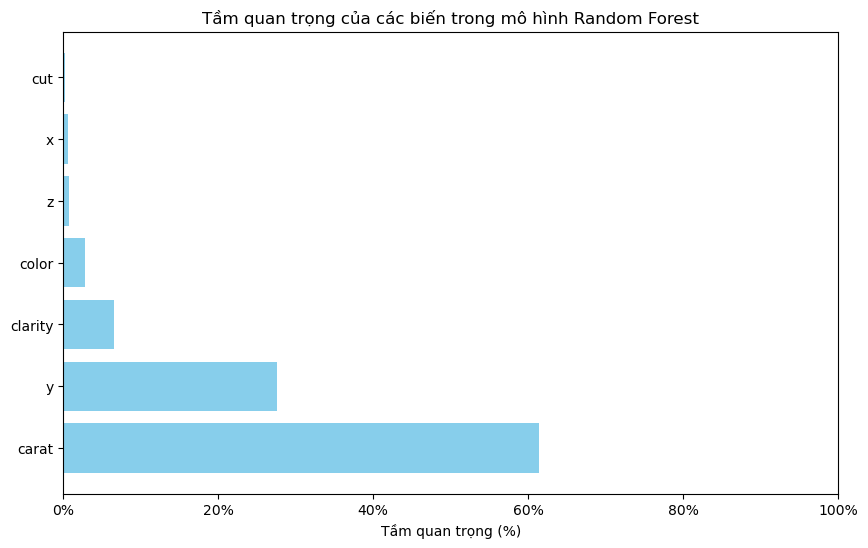

In [34]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Dự đoán giá trị
y_pred_rf = rf_model.predict(X_test)

# Tầm quan trọng của các biến
importances = rf_model.feature_importances_
feature_names = X.columns

# Chuyển đổi thành DataFrame và sắp xếp
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Importance'] = importance_df['Importance'] * 100

# Vẽ biểu đồ tầm quan trọng của các biến
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Tầm quan trọng (%)')  # Cập nhật nhãn trục x
plt.title('Tầm quan trọng của các biến trong mô hình Random Forest')

# Thiết lập định dạng cho trục x để hiển thị giá trị
plt.xlim(0, 100)  # Thiết lập giới hạn cho trục x từ 0 đến 100
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))  # Định dạng trục x

plt.show()


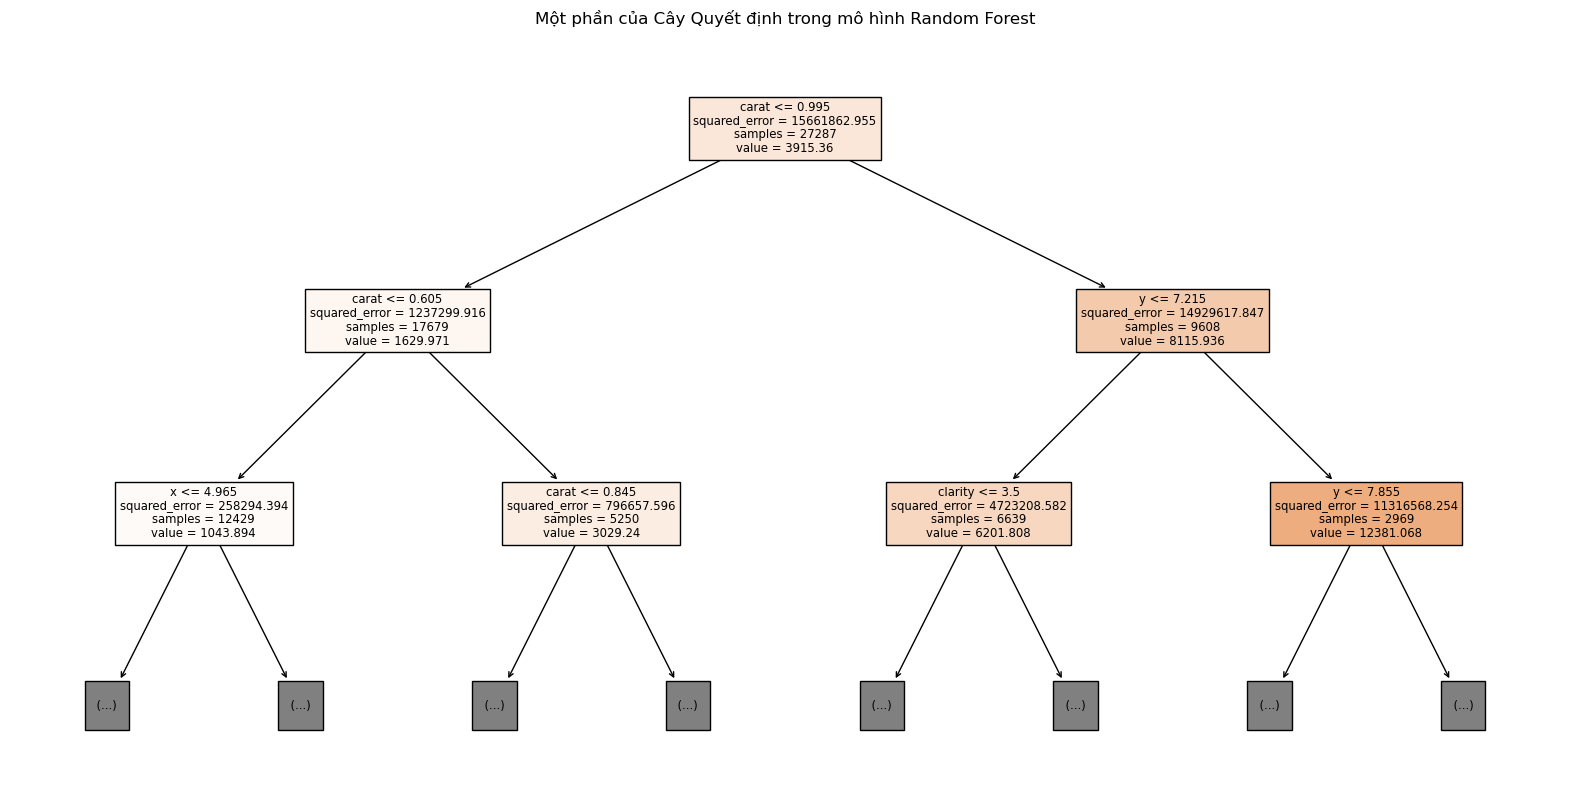

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Trực quan hóa cây quyết định đầu tiên trong Random Forest với độ sâu giới hạn
plt.figure(figsize=(20, 10))
# Hiển thị tới độ sâu 2
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, max_depth=2)
plt.title('Một phần của Cây Quyết định trong mô hình Random Forest')
plt.show()


## Chú thích:
    Carat: đơn vị đo khối lượng kim cương
    squared_error: Tổng bình phương sai số - là một chỉ số đo lường sai lệch giữa giá trị thực tế và giá trị dự đoán
    Công thức tổng quát: squared_error = (Y_thực tế - Y_Tổng quát)^2
    samples: Số lượng mẫu dữ liệu (điểm dữ liệu) có mặt tại một node nhất định trong cây quyết định
    Value: Biểu thị giá trị trung bình của biến mục tiêu (target) cho các mẫu thuộc node đó

In [36]:
# Import thư viện
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



# Dự đoán trên tập kiểm tra
y_pred_tree = rf_model.predict(X_test)

# Tính các chỉ số sai số
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

# In các chỉ số đánh giá
print(f'Mean Absolute Error (MAE) - Cây quyết định: {mae_tree}')
print(f'Mean Squared Error (MSE) - Cây quyết định: {mse_tree}')
print(f'Root Mean Squared Error (RMSE) - Cây quyết định: {rmse_tree}')
print(f'R² score - Cây quyết định: {r2_tree}')


Mean Absolute Error (MAE) - Cây quyết định: 271.91870893324636
Mean Squared Error (MSE) - Cây quyết định: 300647.8608477866
Root Mean Squared Error (RMSE) - Cây quyết định: 548.3136518889409
R² score - Cây quyết định: 0.9810875487423957


In [3]:
import joblib
import pandas as pd
import tkinter as tk
from tkinter import messagebox

# Tải mô hình đã huấn luyện và các encoder
rf_model = joblib.load('random_forest_model.pkl')
cut_encoder = joblib.load('cut_encoder.pkl')
color_encoder = joblib.load('color_encoder.pkl')
clarity_encoder = joblib.load('clarity_encoder.pkl')

# Hàm dự đoán giá kim cương
def predict_diamond_price(carat, cut, color, clarity, x, y, z):
    # Tạo dataframe cho dữ liệu mới
    new_data = pd.DataFrame({
        'carat': [carat],
        'cut': [cut],
        'color': [color],
        'clarity': [clarity],
        'x': [x],
        'y': [y],
        'z': [z]
    })

    # Dự đoán giá
    predicted_price = rf_model.predict(new_data)
    return predicted_price[0]

# Hàm xử lý sự kiện khi người dùng nhấn nút "Dự đoán"
def on_predict():
    try:
        # Lấy dữ liệu từ các entry
        carat = float(entry_carat.get())
        cut = cut_var.get()
        color = color_var.get()
        clarity = clarity_var.get()
        x = float(entry_x.get())
        y = float(entry_y.get())
        z = float(entry_z.get())

        # Mã hóa các giá trị theo đúng mô hình đã huấn luyện
        cut_encoded = cut_encoder.transform([cut])[0]
        color_encoded = color_encoder.transform([color])[0]
        clarity_encoded = clarity_encoder.transform([clarity])[0]

        # Dự đoán giá kim cương
        predicted_price = predict_diamond_price(carat, cut_encoded, color_encoded, clarity_encoded, x, y, z)

        # Hiển thị kết quả
        messagebox.showinfo("Kết quả", f"Giá dự đoán cho viên kim cương là: ${predicted_price:.2f}")

    except Exception as e:
        messagebox.showerror("Lỗi", f"Đã có lỗi xảy ra: {str(e)}")

# Tạo cửa sổ chính
root = tk.Tk()
root.title("Dự đoán giá kim cương")



# Tạo các nhãn và ô nhập liệu
tk.Label(root, text="Carat:").grid(row=0, column=0)
entry_carat = tk.Entry(root)
entry_carat.grid(row=0, column=1)

tk.Label(root, text="Cut:").grid(row=1, column=0)
cut_var = tk.StringVar(root)
cut_var.set("Ideal")  # Giá trị mặc định
cut_menu = tk.OptionMenu(root, cut_var, "Ideal", "Premium", "Good", "Very Good", "Fair")
cut_menu.grid(row=1, column=1)

tk.Label(root, text="Color:").grid(row=2, column=0)
color_var = tk.StringVar(root)
color_var.set("D")  # Giá trị mặc định
color_menu = tk.OptionMenu(root, color_var, "D", "E", "F", "G", "H", "I", "J")
color_menu.grid(row=2, column=1)

tk.Label(root, text="Clarity:").grid(row=3, column=0)
clarity_var = tk.StringVar(root)
clarity_var.set("IF")  # Giá trị mặc định
clarity_menu = tk.OptionMenu(root, clarity_var, "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1")
clarity_menu.grid(row=3, column=1)

tk.Label(root, text="Chiều dài (X):").grid(row=4, column=0)
entry_x = tk.Entry(root)
entry_x.grid(row=4, column=1)

tk.Label(root, text="Chiều rộng (Y):").grid(row=5, column=0)
entry_y = tk.Entry(root)
entry_y.grid(row=5, column=1)

tk.Label(root, text="Chiều sâu (Z):").grid(row=6, column=0)
entry_z = tk.Entry(root)
entry_z.grid(row=6, column=1)

# Nút "Dự đoán"
predict_button = tk.Button(root, text="Dự đoán", command=on_predict)
predict_button.grid(row=7, column=0, columnspan=2)

# Chạy vòng lặp chính
root.mainloop()
